My plan is to create a bot that parses the 10 last major news articles for a given keyword in order to generate a summary of each article in a few seconds followed by a sentiment analysis.

This is informative and useful to anyone as a trader/investor when considering recent stocks or crypto news!

You can also use it for fun or out of curiosity for any given keyword of your interest!

The flow of the bot:
1_Extract => 2_Summarize => 3_Analyze

1_We extract the articles from Google news with the Google News python package.
2_We summarize each article using Newspaper Python Package
3_Run sentiment analysis on each summary with the help of VADER.

In [13]:
# !pip install GoogleNews
# !pip install nltk
# !pip install newspaper3k
# !pip install wordcloud

^C


You should consider upgrading via the 'c:\Users\Fluffy\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Fluffy\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Fluffy\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Fluffy\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


In [1]:
#Importing Libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS


import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from textblob import TextBlob

import nltk
plt.style.use('fivethirtyeight')
%matplotlib inline

#Required for Sentiment Analysis
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fluffy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


News Extraction.

In [2]:
#Defining the dates to be used in the GoogleNews Query in next cell
now = dt.date.today()
now = now.strftime('%m-%d-%Y')

yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'

config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fluffy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Keep in mind that the Google News package fetches only the 10 most recent news, we will bypass this with a loop in order to extract all possible articles in the first 10 pages in Google News.

In [3]:
keyword_interest = input("Please provide the name of the asset, stock or crypto of interest")
if keyword_interest != '':
    print(f'Extracting & Analyzing {keyword_interest}, it takes sometime!')
googlenews = GoogleNews(start = yesterday, end = now )
googlenews.search(keyword_interest)
googlenews.total_count()

result = googlenews.result()

#This loop is to bypass the limit of 10 articles
for i in range(2,8):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)

#Storing Results in a pd DataFrame
list=[]
df = pd.DataFrame(result)
print(df)

Extracting & Analyzing bitcoin, it takes sometime!
                                                title             media  \
0   First Mover Americas: Bitcoin Back Below $30K ...          CoinDesk   
1   Terra's LUNA Holds Ground Near All Time Lows E...            Forbes   
2   Bitcoin is now better than the stock market bu...          FXStreet   
3   Bitcoin, Ethereum Technical Analysis: BTC Belo...      Bitcoin News   
4   Market Wrap: Bitcoin Dips, Stocks Plummet as V...          CoinDesk   
..                                                ...               ...   
65  The Bitcoin And Ethereum Crash, Nasdaq Crash A...            Forbes   
66  Argo Blockchain 1Q Profit Dropped on Higher Co...       MarketWatch   
67  Microstrategy chief: 'Bitcoin is going to go i...     Yahoo Finance   
68     Bitcoin mining stock report: Wednesday, May 18  The Block Crypto   
69  Finder's Panel Predicts Death of Shiba Inu Cry...      Bitcoin News   

           date                   datetime  \
0 

Article Summarizing, be patient could take more than 2 minutes to run!!!

In [4]:
try:
    list = []
    for i in df.index:
        #Empty dictionary to append each article in each iteration
        dict = {}
        article = Article(df['link'][i], config = config)
        try:
            article.download()
            article.parse()
            article.nlp()
        except:
            pass
        dict['Date'] = df['date'][i]
        dict['Media'] = df['media'][i]
        dict['Title'] = article.title
        dict['Article'] = article.text
        dict['Summary'] = article.summary
        dict['Key_words'] = article.keywords
        list.append(dict)
    check_empty = not any(list)

    if check_empty == False:
        news_DF = pd.DataFrame(list)
        print(news_DF)

except Exception as e:
    print("There is an exception:"+ str(e))
    print("There are some issues in retrieving the date. Try again or enter a different keyword of interest!")

           Date             Media  \
0     1 day ago          CoinDesk   
1   3 hours ago            Forbes   
2   7 hours ago          FXStreet   
3     1 day ago      Bitcoin News   
4   8 hours ago          CoinDesk   
..          ...               ...   
65   2 mins ago            Forbes   
66    1 day ago       MarketWatch   
67   6 mins ago     Yahoo Finance   
68  8 hours ago  The Block Crypto   
69  4 hours ago      Bitcoin News   

                                                Title  \
0   First Mover Americas: Bitcoin Back Below $30K ...   
1   Terra’s LUNA Holds Ground Near All Time Lows E...   
2   Bitcoin is now better than the stock market bu...   
3   Bitcoin, Ethereum Technical Analysis: BTC Belo...   
4   Market Wrap: Bitcoin Dips, Stocks Plummet as V...   
..                                                ...   
65  The Bitcoin And Ethereum Crash, Nasdaq Crash A...   
66  Argo Blockchain 1Q Profit Dropped on Higher Co...   
67  Microstrategy chief: 'Bitcoin is going

In [5]:
news_DF.head()


,Date,Media,Title,Article,Summary,Key_words
0,1 day ago,CoinDesk,First Mover Americas: Bitcoin Back Below $30K ...,"""What we need to see is inflation coming down ...","""What we need to see is inflation coming down ...","[need, inflation, miss, workers, stability, un..."
1,3 hours ago,Forbes,Terra’s LUNA Holds Ground Near All Time Lows E...,"Do Kwon, co-founder and chief executive office...",Photographer: Woohae Cho/Bloomberg © 2022 Bloo...,"[near, broader, bitcoin, million, luna, terra,..."
2,7 hours ago,FXStreet,Bitcoin is now better than the stock market bu...,"On Wednesday, Bitcoin was down 3%, ending the ...","The total capitalisation of the crypto market,...","[near, bitcoin, investors, crypto, market, sup..."
3,1 day ago,Bitcoin News,"Bitcoin, Ethereum Technical Analysis: BTC Belo...","Bitcoin, Ethereum Technical Analysis: BTC Belo...","Bitcoin, Ethereum Technical Analysis: BTC Belo...","[crypto, session, ethereum, bitcoin, level, tu..."
4,8 hours ago,CoinDesk,"Market Wrap: Bitcoin Dips, Stocks Plummet as V...","For now, alternative cryptos (altcoins) contin...","For now, alternative cryptos (altcoins) contin...","[bitcoin, wrap, traders, plummet, market, peri..."


Subjectivity

In [6]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create 2 columns
news_DF['Subjectivity'] = news_DF['Summary'].apply(getSubjectivity)
news_DF['Polarity'] = news_DF['Summary'].apply(getPolarity)
news_DF.drop(['Key_words', 'Media'], axis=1, inplace= True)

#Preview the DF with Subjectivity &  Polarity columns
news_DF.head()

,Date,Title,Article,Summary,Subjectivity,Polarity
0,1 day ago,First Mover Americas: Bitcoin Back Below $30K ...,"""What we need to see is inflation coming down ...","""What we need to see is inflation coming down ...",0.468056,0.161111
1,3 hours ago,Terra’s LUNA Holds Ground Near All Time Lows E...,"Do Kwon, co-founder and chief executive office...",Photographer: Woohae Cho/Bloomberg © 2022 Bloo...,0.417080,0.118733
2,7 hours ago,Bitcoin is now better than the stock market bu...,"On Wednesday, Bitcoin was down 3%, ending the ...","The total capitalisation of the crypto market,...",0.580952,0.167857
3,1 day ago,"Bitcoin, Ethereum Technical Analysis: BTC Belo...","Bitcoin, Ethereum Technical Analysis: BTC Belo...","Bitcoin, Ethereum Technical Analysis: BTC Belo...",0.341667,-0.152381
4,8 hours ago,"Market Wrap: Bitcoin Dips, Stocks Plummet as V...","For now, alternative cryptos (altcoins) contin...","For now, alternative cryptos (altcoins) contin...",0.238194,-0.140278


Computing Negative, Neutral & Positive Analysis

In [7]:
 def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else:
        return 'Positive'

#Adding Analysis column to our DF
news_DF['Analysis'] = news_DF['Polarity'].apply(getAnalysis)
news_DF.head()

,Date,Title,Article,Summary,Subjectivity,Polarity,Analysis
0,1 day ago,First Mover Americas: Bitcoin Back Below $30K ...,"""What we need to see is inflation coming down ...","""What we need to see is inflation coming down ...",0.468056,0.161111,Positive
1,3 hours ago,Terra’s LUNA Holds Ground Near All Time Lows E...,"Do Kwon, co-founder and chief executive office...",Photographer: Woohae Cho/Bloomberg © 2022 Bloo...,0.417080,0.118733,Positive
2,7 hours ago,Bitcoin is now better than the stock market bu...,"On Wednesday, Bitcoin was down 3%, ending the ...","The total capitalisation of the crypto market,...",0.580952,0.167857,Positive
3,1 day ago,"Bitcoin, Ethereum Technical Analysis: BTC Belo...","Bitcoin, Ethereum Technical Analysis: BTC Belo...","Bitcoin, Ethereum Technical Analysis: BTC Belo...",0.341667,-0.152381,Negative
4,8 hours ago,"Market Wrap: Bitcoin Dips, Stocks Plummet as V...","For now, alternative cryptos (altcoins) contin...","For now, alternative cryptos (altcoins) contin...",0.238194,-0.140278,Negative


Printing all positive Summary

In [8]:
# j = 1
# sorted_DF = news_DF.sort_values(by = ['Polarity'])
# for i in range(0, sorted_DF.shape[0]):
#     if(sorted_DF['Analysis'][i] == 'Positive'):
#         print(str(j) + ')' + sorted_DF['Summary'][i])
#         print()
#         j = j + 1

Printing All Negative Summaries

In [9]:
# j = 1
# sorted_DF = news_DF.sort_values(by=['Polarity'], ascending='False')
# for i in range(0, sorted_DF.shape[0]):
#     if(sorted_DF['Analysis'][i] == 'Negative'):
#         print(str(j) + ')' + sorted_DF['Summary'][i])
#         print()
#         j = j+1


Plotting the Polarity & Subjectivity:
    When dots show big horizontal spread => there are big differences of opinion about the keyword of interest.
    When dots are clustered near 0.0 horizontally => same ideas are shared regarding the keyword of interest.

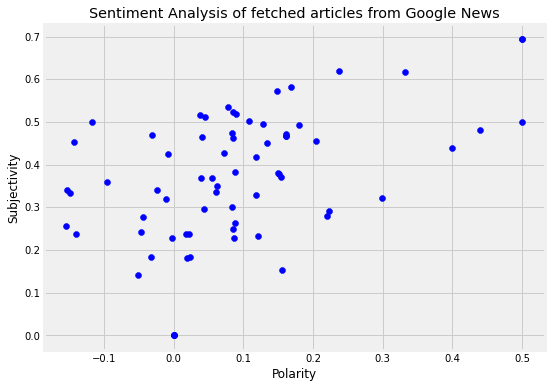

In [10]:
plt.figure(figsize=(8, 6))
for i in range(0, news_DF.shape[0]):
    plt.scatter(news_DF['Polarity'][i], news_DF['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis of fetched articles from Google News')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

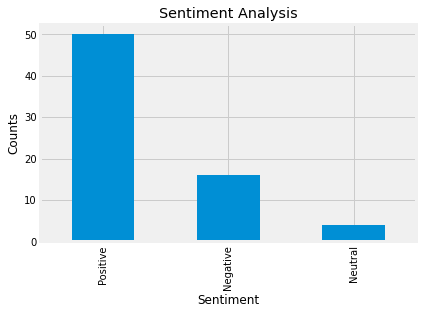

In [11]:
#Value Counts Positive, Negative, Neutral of Articles
news_DF['Analysis'].value_counts()

#Plot & Visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
news_DF['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

WordCloud for bitcoin


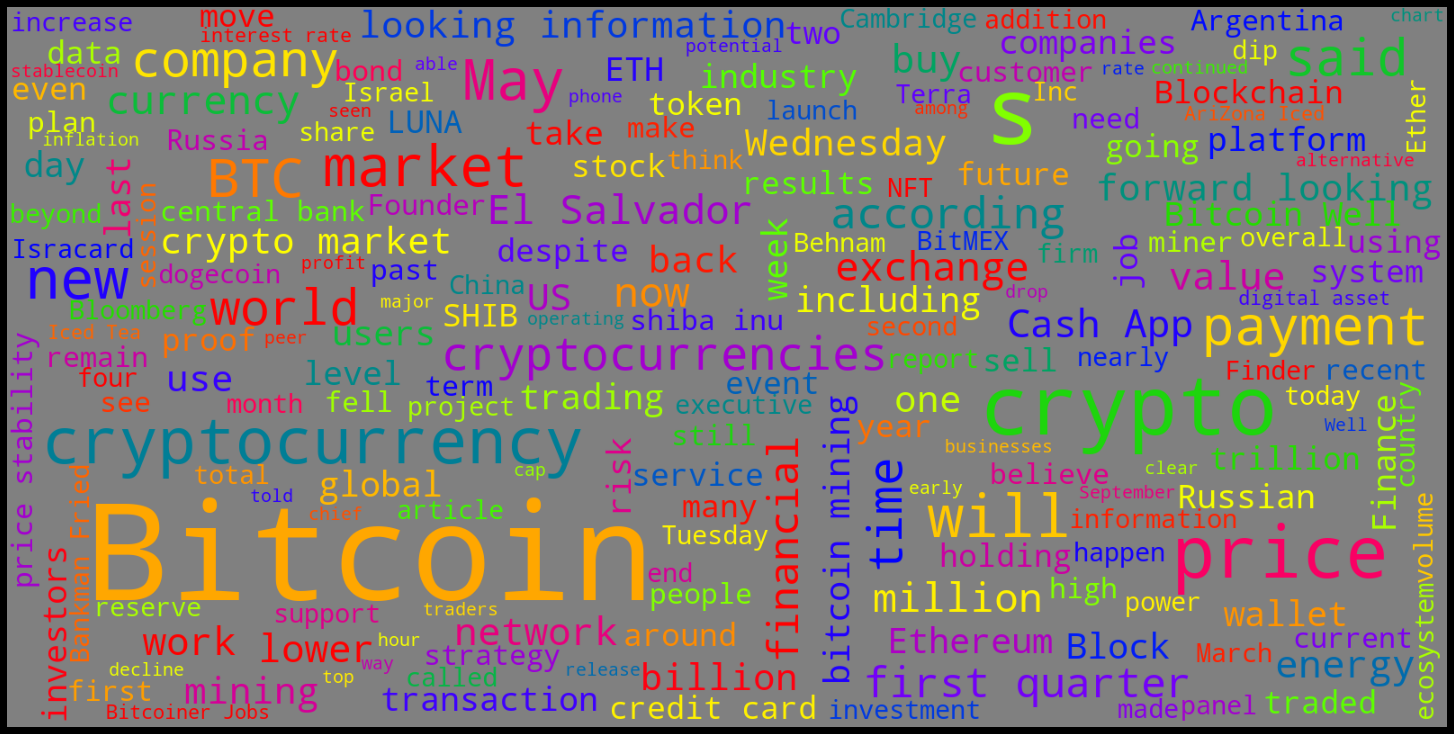

In [12]:
def cloud_words(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color = 'grey', width = 1600, height = 800, stopwords = stopwords, min_font_size= 18, max_font_size= 150, colormap= 'prism').generate(allWords)

    fig, ax = plt.subplots(figsize = (20,10), facecolor = 'k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad = 0)
    plt.show()

print('WordCloud for ' + keyword_interest)
cloud_words(news_DF['Summary'].values)